## Entanglement Distillation

Simulation eines "Entanglement Distillation"

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, execute, Aer, IBMQ
from qiskit.circuit import QuantumCircuit,Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

In [2]:
backend = Aer.get_backend('qasm_simulator')
phi = Parameter('Phi')

phi_value =  np.pi/6 
print("|Psi> = alpha |0> + beta |1>")
print("alpha^2 : {:>5f}".format(np.cos(phi_value)**2) )
print("beta^2  : {:>5f}".format(np.sin(phi_value)**2) )

|Psi> = alpha |0> + beta |1>
alpha^2 : 0.750000
beta^2  : 0.250000


## Erzeugung eines Zustand

$$
|\Psi\rangle = \sqrt{\frac{3}{4}} |0\rangle + \sqrt{\frac{1}{4}} |1\rangle
$$

Beachte: Der Zustand entspricht keiner gleichmäßigen Superposition!

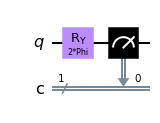

In [3]:
circuit1 = QuantumCircuit(1,1)
circuit1.ry(2*phi,0)
circuit1.measure([0],[0])
circuit1.draw('mpl')

{'0': 7500, '1': 2500}


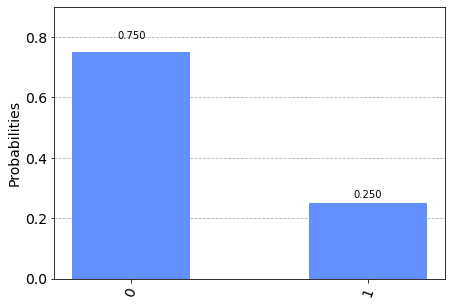

In [4]:
runcircuit1 = circuit1.bind_parameters({phi: phi_value })

job = execute(runcircuit1, backend, shots=10000)
result = job.result()
counts = result.get_counts(runcircuit1)
print(counts)
plot_histogram(counts)

## Erzeugung eines verschränkten Zustands

Das Qubit $q_0$ ist hier nicht in einer gleichmäßigen Superposition. Somit erhält man auch keinen Bell-Zustand (maximal verschränkten Zustand)

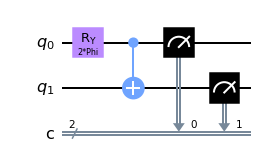

In [5]:
circuit2 = QuantumCircuit(2,2)
circuit2.ry(2*phi,0)
circuit2.cx(0,1)
circuit2.measure([0,1],[0,1])
circuit2.draw('mpl')

{'11': 2579, '00': 7421}


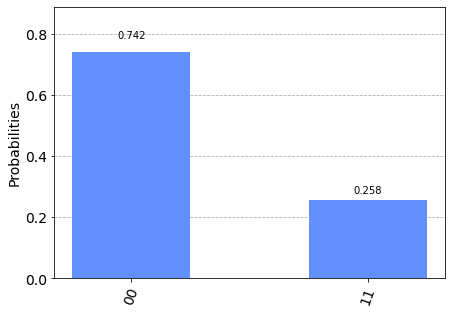

In [6]:
runcircuit2 = circuit2.bind_parameters({phi: phi_value })

job = execute(runcircuit2, backend, shots=10000)
result = job.result()
counts = result.get_counts(runcircuit2)
print(counts)
plot_histogram(counts)

## Führe Distillation aus

Eingabe sind hier zwei nicht gleichmäßig superpositionierte Zustände.

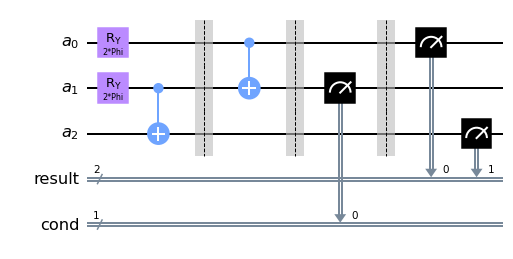

In [7]:

qc = QuantumCircuit()
qr = QuantumRegister(3,'a')
qc.add_register( qr )

crResult = ClassicalRegister(2,'result')
qc.add_register( crResult )
crCond = ClassicalRegister(1,'cond')
qc.add_register( crCond )

qc.ry(2*phi,0)
qc.ry(2*phi,1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)

qc.barrier()
qc.measure(qr[1],crCond[0])

# Transform to |ERP> state: |00> + |11>
# qc.barrier()
# qc.x(qr[0])

qc.barrier()
qc.measure(qr[0],crResult[0])
qc.measure(qr[2],crResult[1])

qc.draw('mpl')

In [8]:
qc = qc.bind_parameters({phi: phi_value })

{'0 00': 5546, '1 10': 1893, '1 01': 1927, '0 11': 634}


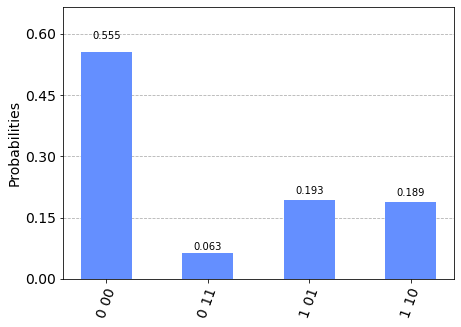

In [9]:
job = execute(qc, backend, shots=10000)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Interpretation des Diagramms

Wir für $a_1$ der Wert 1 gemessen, dann sind $|a_0a_3\rangle$ in einem Bell-Zustand $\frac{1}{\sqrt{2}}(|01\rangle \pm |10\rangle$, wurde der Wert 0 gemessen, dann hat man eine Zustand $|a_0a_3\rangle$ erhalten, der noch "weniger gleichmäßig superpositioniert" ist.

### Vergleich der Koeffizienten

Analystische Bestimmung der Koeffizienten

In [10]:
alpha = np.cos(phi_value)
beta  = np.sin(phi_value)

print("Measurement values")
print(" |0>|00> => {:>5f}".format( (alpha**2)**2 ) )
print(" |0>|11> => {:>5f}".format( (beta**2)**2 ) )
print(" |1>|01> => {:>5f}".format( (alpha*beta)**2 ) )
print(" |1>|10> => {:>5f}".format( (alpha*beta)**2 ) )

Measurement values
 |0>|00> => 0.562500
 |0>|11> => 0.062500
 |1>|01> => 0.187500
 |1>|10> => 0.187500
